In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Sequential API
---

In [2]:
model = keras.Sequential(name='my_first_example')
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "my_first_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

# Functional API
---

In [3]:
inputs   = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs  = layers.Dense(10, activation='softmax')(features)
model    = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
vocabulary_size = 1000
num_tags        = 100
num_departments = 4

title     = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags      = keras.Input(shape=(num_tags,), name='tags')

features  = layers.Concatenate()([title, text_body, tags])
features  = layers.Dense(64, activation='relu')(features)

priority   = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 1000)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 1000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2100)      │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │    134,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 134,789 (526.52 KB)

 Trainable params: 134,789 (526.52 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import numpy as np

num_samples = 1280

title_data     = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data      = np.random.randint(0,2 , size=(num_samples, num_tags))

priority_data   = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0,2 , size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss={'priority' : 'mean_squared_error', 'department' : 'categorical_crossentropy'},
              metrics={'priority' : ['mean_absolute_error'], 'department' : ['accuracy']})

model.fit({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data},
          {'priority' : priority_data, 'department' : department_data},
          epochs=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.2210 - department_loss: 13.6508 - loss: 13.9690 - priority_loss: 0.3181 - priority_mean_absolute_error: 0.4840


In [17]:
model.evaluate({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data},
          {'priority' : priority_data, 'department' : department_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_accuracy: 0.5633 - department_loss: 9.1870 - loss: 9.5052 - priority_loss: 0.3182 - priority_mean_absolute_error: 0.4804


[9.801149368286133,
 0.32395946979522705,
 9.477188110351562,
 0.5406249761581421,
 0.4883194863796234]

In [18]:
[priority_preds, department_preds] = model.predict({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data})
print(f'Priority predictions are: {priority_preds}')
print(f'Department predictions are: {department_preds}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Priority predictions are: [[1.0510293e-08]
 [5.1628007e-08]
 [4.9532503e-08]
 ...
 [2.3296238e-08]
 [4.9288790e-08]
 [2.9452682e-08]]
Department predictions are: [[9.3197030e-01 3.1440170e-04 1.6062425e-03 6.6108994e-02]
 [8.9297074e-01 3.6182182e-04 1.0794095e-03 1.0558793e-01]
 [9.3575764e-01 6.9702000e-05 1.9534628e-03 6.2219169e-02]
 ...
 [9.3794882e-01 5.0691946e-05 9.3890319e-04 6.1061643e-02]
 [9.3680429e-01 2.3236807e-05 6.8582688e-04 6.2486771e-02]
 [9.3442595e-01 2.0115670e-04 1.8387710e-03 6.3534170e-02]]


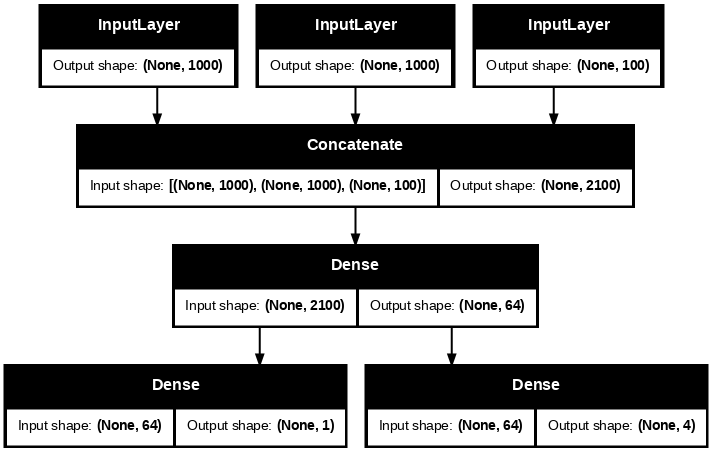

In [21]:
keras.utils.plot_model(model, 'ticket_classifier.png', show_shapes=True, dpi=72)

In [22]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [23]:
model.layers[3].output

<KerasTensor shape=(None, 2100), dtype=float32, sparse=False, name=keras_tensor_7>

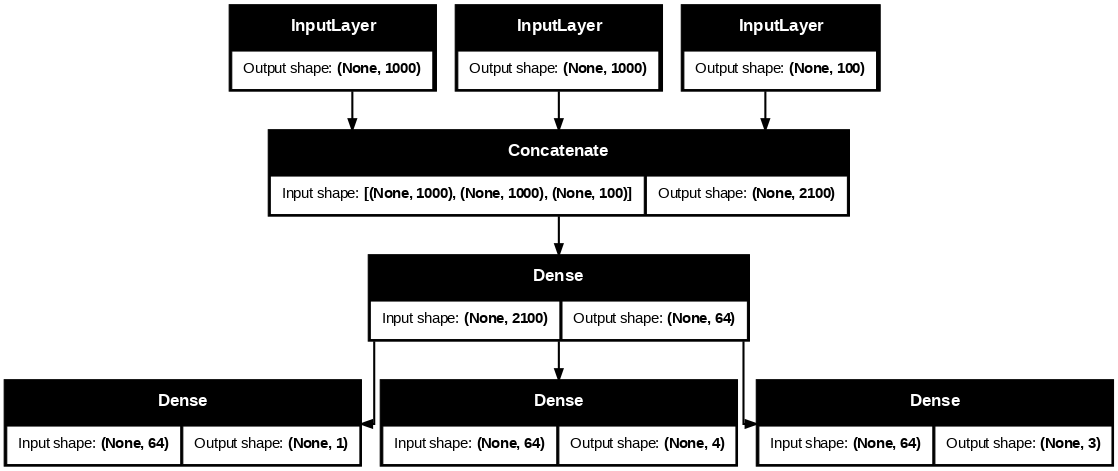

In [25]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs=[title, text_body, tags]
                        , outputs=[priority, department, difficulty])

keras.utils.plot_model(new_model, 'new_model_with_difficulty_layer.png', dpi=75
                       , show_shapes=True)

# Subclassing
---

In [31]:
class CustomerTickerModel(keras.Model):

  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer          = layers.Concatenate()
    self.mixing_layer          = layers.Dense(64, activation='relu')
    self.priority_scorer       = layers.Dense(1, activation='sigmoid')
    self.department_classifier = layers.Dense(num_departments, activation='softmax')

  def call(self, inputs):
    title     = inputs['title']
    text_body = inputs['text_body']
    tags      = inputs['tags']

    features    = self.concat_layer([title, text_body, tags])
    features    = self.mixing_layer(features)
    priority    = self.priority_scorer(features)
    departments = self.department_classifier(features)
    return priority, department

model = CustomerTickerModel(num_departments=4)

In [32]:
priority, department = model(
    {'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data})